In [36]:
#more is better
import pandas as pd
import numpy as np
import pulp as p

In [37]:
#df for budget constraints
df = pd.read_csv("Optimization term project - constraints.csv")
#df1 for cost matrix (weight factor for LP coefficients)
df1 = pd.read_csv("Optimization term project - weight factors.csv")

In [38]:
!nvidia-smi

Sun Dec 10 13:43:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.30       Driver Version: 457.30       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce MX250      WDDM  | 00000000:06:00.0 Off |                  N/A |
| N/A   46C    P8    N/A /  N/A |     64MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:
df1.head()

weight factor  Tuberculosis (TB)     Malaria  Cardiovascular Disease  \
0           USA              55548     3332876                      75   
1        Brazil               2796      371230                     161   
2         Japan               6782  1000000000                     119   
3         China               4413    14121750                     136   
4         India                295     1523842                     114   

   Cancer Covid-19  Asthma  Malnutrition  infant mortality trauma  \
0      73       94   11903         11110                20    734   
1      87      111    9174          3623                 8    459   
2      88    3,616   27806         24391                50  2,395   
3      71   29,488    7752         12820                20    540   
4     120      951     541         14286                 4    683   

   Parkinson's disease  
0                 2198  
1                 5208  
2                 4292  
3                 2532  
4                 2188

In [40]:
for i in range(10):
    list_ex = df1.iloc[i].tolist()
    print(list_ex)

['USA', 55548, 3332876, 75, 73, '94', 11903, 11110, 20, '734', 2198]
['Brazil', 2796, 371230, 161, 87, '111', 9174, 3623, 8, '459', 5208]
['Japan', 6782, 1000000000, 119, 88, '3,616', 27806, 24391, 50, '2,395', 4292]
['China', 4413, 14121750, 136, 71, '29,488', 7752, 12820, 20, '540', 2532]
['India', 295, 1523842, 114, 120, '951', 541, 14286, 4, '683', 2188]
['Indonesia', 250, 23832, 113, 89, '1,234', 746, 874, 5, '720', 2083]
['Nigeria', 146, 113, 305, 102, '16,954', 934, 4237, 1, '614', 1786]
['D.R Congo', 188, 15, 355, 97, '16,226', 482, 840, 2, '361', 2703]
['Germany', 75071, 1000000000, 54, 71, '179', 21726, 66730, 33, '2,527', 2353]
['U.K', 33486, 2232380, 73, 66, '71', 11627, 111619, 25, '3,306', 2321]


In [41]:
solver_list = p.listSolvers(onlyAvailable=True)
print(solver_list)
solver = p.getSolver('GLPK_CMD')

['PULP_CBC_CMD']


In [42]:
Lp_prob = p.LpProblem('Problem', p.LpMinimize)
#for variable number xij represents ith country and jth disease
x11 = p.LpVariable("x11", lowBound = 0)
x12 = p.LpVariable("x12", lowBound = 0)
x13 = p.LpVariable("x13", lowBound = 0)
x14 = p.LpVariable("x14", lowBound = 0)
x15 = p.LpVariable("x15", lowBound = 0)
x16 = p.LpVariable("x16", lowBound = 0)
x17 = p.LpVariable("x17", lowBound = 0)
x18 = p.LpVariable("x18", lowBound = 0)
x19 = p.LpVariable("x19", lowBound = 0)
x110 = p.LpVariable("x110", lowBound = 0)
x21 = p.LpVariable("x21", lowBound = 0)
x22 = p.LpVariable("x22", lowBound = 0)
x23 = p.LpVariable("x23", lowBound = 0)
x24 = p.LpVariable("x24", lowBound = 0)
x25 = p.LpVariable("x25", lowBound = 0)
x26 = p.LpVariable("x26", lowBound = 0)
x27 = p.LpVariable("x27", lowBound = 0)
x28 = p.LpVariable("x28", lowBound = 0)
x29 = p.LpVariable("x29", lowBound = 0)
x210 = p.LpVariable("x210", lowBound = 0)
x31 = p.LpVariable("x31", lowBound = 0)
x32 = p.LpVariable("x32", lowBound = 0)
x33 = p.LpVariable("x33", lowBound = 0)
x34 = p.LpVariable("x34", lowBound = 0)
x35 = p.LpVariable("x35", lowBound = 0)
x36 = p.LpVariable("x36", lowBound = 0)
x37 = p.LpVariable("x37", lowBound = 0)
x38 = p.LpVariable("x38", lowBound = 0)
x39 = p.LpVariable("x39", lowBound = 0)
x310 = p.LpVariable("x310", lowBound = 0)
x41 = p.LpVariable("x41", lowBound = 0)
x42 = p.LpVariable("x42", lowBound = 0)
x43 = p.LpVariable("x43", lowBound = 0)
x44 = p.LpVariable("x44", lowBound = 0)
x45 = p.LpVariable("x45", lowBound = 0)
x46 = p.LpVariable("x46", lowBound = 0)
x47 = p.LpVariable("x47", lowBound = 0)
x48 = p.LpVariable("x48", lowBound = 0)
x49 = p.LpVariable("x49", lowBound = 0)
x410 = p.LpVariable("x410", lowBound = 0)
x51 = p.LpVariable("x51", lowBound = 0)
x52 = p.LpVariable("x52", lowBound = 0)
x53 = p.LpVariable("x53", lowBound = 0)
x54 = p.LpVariable("x54", lowBound = 0)
x55 = p.LpVariable("x55", lowBound = 0)
x56 = p.LpVariable("x56", lowBound = 0)
x57 = p.LpVariable("x57", lowBound = 0)
x58 = p.LpVariable("x58", lowBound = 0)
x59 = p.LpVariable("x59", lowBound = 0)
x510 = p.LpVariable("x510", lowBound = 0)
x61 = p.LpVariable("x61", lowBound = 0)
x62 = p.LpVariable("x62", lowBound = 0)
x63 = p.LpVariable("x63", lowBound = 0)
x64 = p.LpVariable("x64", lowBound = 0)
x65 = p.LpVariable("x65", lowBound = 0)
x66 = p.LpVariable("x66", lowBound = 0)
x67 = p.LpVariable("x67", lowBound = 0)
x68 = p.LpVariable("x68", lowBound = 0)
x69 = p.LpVariable("x69", lowBound = 0)
x610 = p.LpVariable("x610", lowBound = 0)
x71 = p.LpVariable("x71", lowBound = 0)
x72 = p.LpVariable("x72", lowBound = 0)
x73 = p.LpVariable("x73", lowBound = 0)
x74 = p.LpVariable("x74", lowBound = 0)
x75 = p.LpVariable("x75", lowBound = 0)
x76 = p.LpVariable("x76", lowBound = 0)
x77 = p.LpVariable("x77", lowBound = 0)
x78 = p.LpVariable("x78", lowBound = 0)
x79 = p.LpVariable("x79", lowBound = 0)
x710 = p.LpVariable("x710", lowBound = 0)
x81 = p.LpVariable("x81", lowBound = 0)
x82 = p.LpVariable("x82", lowBound = 0)
x83 = p.LpVariable("x83", lowBound = 0)
x84 = p.LpVariable("x84", lowBound = 0)
x85 = p.LpVariable("x85", lowBound = 0)
x86 = p.LpVariable("x86", lowBound = 0)
x87 = p.LpVariable("x87", lowBound = 0)
x88 = p.LpVariable("x88", lowBound = 0)
x89 = p.LpVariable("x89", lowBound = 0)
x810 = p.LpVariable("x810", lowBound = 0)
x91 = p.LpVariable("x91", lowBound = 0)
x92 = p.LpVariable("x92", lowBound = 0)
x93 = p.LpVariable("x93", lowBound = 0)
x94 = p.LpVariable("x94", lowBound = 0)
x95 = p.LpVariable("x95", lowBound = 0)
x96 = p.LpVariable("x96", lowBound = 0)
x97 = p.LpVariable("x97", lowBound = 0)
x98 = p.LpVariable("x98", lowBound = 0)
x99 = p.LpVariable("x99", lowBound = 0)
x910 = p.LpVariable("x910", lowBound = 0)
x101 = p.LpVariable("x101", lowBound = 0)
x102 = p.LpVariable("x102", lowBound = 0)
x103 = p.LpVariable("x103", lowBound = 0)
x104 = p.LpVariable("x104", lowBound = 0)
x105 = p.LpVariable("x105", lowBound = 0)
x106 = p.LpVariable("x106", lowBound = 0)
x107 = p.LpVariable("x107", lowBound = 0)
x108 = p.LpVariable("x108", lowBound = 0)
x109 = p.LpVariable("x109", lowBound = 0)
x1010 = p.LpVariable("x1010", lowBound = 0)

In [43]:
# Objective Function 
Lp_prob += 55548 * x11 +3332876 * x12 +75 * x13 +73 * x14 +94 * x15 +11903 * x16 +11110 * x17 +20005 * x18 +734 * x19 +2198 * x110 +2796 * x21 +371230 * x22 +161 * x23 +87 * x24 +111 * x25 +9174 * x26 +3623 * x27 +8 * x28 +459 * x29 +5208 * x210 +6782 * x31 +1000000000 * x32 +119 * x33 +88 * x34 +3616 * x35 +27806 * x36 +24391 * x37 +50 * x38 +2395 * x39 +4292 * x310 +4413 * x41 +14121750 * x42 +136 * x43 +71 * x44 +29488 * x45 +7752 * x46 +12820 * x47 +20 * x48 +540 * x49 +2532 * x410 +295 * x51 +1523842 * x52 +114 * x53 +120 * x54 +951 * x55 +541 * x56 +14286 * x57 +4 * x58 +683 * x59 +2188 * x510 +250 * x61 +23832 * x62 +113 * x63 +89 * x64 +1234 * x65 +746 * x66 +874 * x67 +5 * x68 +720 * x69 +2083 * x610 +146 * x71 +113 * x72 +305 * x73 +102 * x74 +16954 * x75 +934 * x76 +4237 * x77 +1 * x78 +614 * x79 +1786 * x710 +188 * x81 +15 * x82 +355 * x83 +97 * x84 +16226 * x85 +482 * x86 +840 * x87 +2 * x88 +361 * x89 +2703 * x810 +75071 * x91 +1000000000 * x92 +54 * x93 +71 * x94 +179 * x95 +21726 * x96 +66730 * x97 +33 * x98 +2527 * x99 +2353 * x910 +33486 * x101 +2232380 * x102 +73 * x103 +66 * x104 +71 * x105 +11627 * x106 +111619 * x107 +25 * x108 +3306 * x109 +2321 * x1010

In [44]:
#USA
Lp_prob += x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x110   == 4300000
#Brazil
Lp_prob += x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x210   == 2778232
Lp_prob += x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x310   == 287548
Lp_prob += x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x410   == 1199117
Lp_prob += x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x510   == 12801
Lp_prob += x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x610   == 11494
Lp_prob += x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x710   == 1430
Lp_prob += x81 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x89 + x810   == 2014
#Lp_prob += x81 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x89 + x810   <= 2015
Lp_prob += x91 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99 + x910   == 516899
Lp_prob += x101 + x102 + x103 + x104 + x105 + x106 + x107 + x108 + x109 + x1010   == 354210


In [45]:
Lp_prob += x11 + x21 + x31 + x41 + x51 + x61 + x71 + x81 + x91 + x101   >= 70295
Lp_prob += x12 + x22 + x32 + x42 + x52 + x62 + x72 + x82 + x92 + x102   >= 5427
Lp_prob += x13 + x23 + x33 + x43 + x53 + x63 + x73 + x83 + x93 + x103   >= 1095491
Lp_prob += x14 + x24 + x34 + x44 + x54 + x64 + x74 + x84 + x94 + x104   >= 257887
Lp_prob += x15 + x25 + x35 + x45 + x55 + x65 + x75 + x85 + x95 + x105   >= 1209771
Lp_prob += x16 + x26 + x36 + x46 + x56 + x66 + x76 + x86 + x96 + x106   >= 61997
Lp_prob += x17 + x27 + x37 + x47 + x57 + x67 + x77 + x87 + x97 + x107   >= 10875
Lp_prob += x18 + x28 + x38 + x48 + x58 + x68 + x78 + x88 + x98 + x108  >= 5887605
Lp_prob += x19 + x29 + x39 + x49 + x59 + x69 + x79 + x89 + x99 + x109   >= 139734
Lp_prob += x110 + x210 + x310 + x410 + x510 + x610 + x710 + x810 + x910 + x1010   >= 68495

In [46]:
print(Lp_prob) 

Problem:
MINIMIZE
33486*x101 + 2321*x1010 + 2232380*x102 + 73*x103 + 66*x104 + 71*x105 + 11627*x106 + 111619*x107 + 25*x108 + 3306*x109 + 55548*x11 + 2198*x110 + 3332876*x12 + 75*x13 + 73*x14 + 94*x15 + 11903*x16 + 11110*x17 + 20005*x18 + 734*x19 + 2796*x21 + 5208*x210 + 371230*x22 + 161*x23 + 87*x24 + 111*x25 + 9174*x26 + 3623*x27 + 8*x28 + 459*x29 + 6782*x31 + 4292*x310 + 1000000000*x32 + 119*x33 + 88*x34 + 3616*x35 + 27806*x36 + 24391*x37 + 50*x38 + 2395*x39 + 4413*x41 + 2532*x410 + 14121750*x42 + 136*x43 + 71*x44 + 29488*x45 + 7752*x46 + 12820*x47 + 20*x48 + 540*x49 + 295*x51 + 2188*x510 + 1523842*x52 + 114*x53 + 120*x54 + 951*x55 + 541*x56 + 14286*x57 + 4*x58 + 683*x59 + 250*x61 + 2083*x610 + 23832*x62 + 113*x63 + 89*x64 + 1234*x65 + 746*x66 + 874*x67 + 5*x68 + 720*x69 + 146*x71 + 1786*x710 + 113*x72 + 305*x73 + 102*x74 + 16954*x75 + 934*x76 + 4237*x77 + 1*x78 + 614*x79 + 188*x81 + 2703*x810 + 15*x82 + 355*x83 + 97*x84 + 16226*x85 + 482*x86 + 840*x87 + 2*x88 + 361*x89 + 75071*x91 

In [47]:
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])
optimal_budget = p.value(Lp_prob.objective)/10**7


Optimal


In [48]:
print(p.value(x11), p.value(x12), p.value(x13), p.value(x14), p.value(x15), p.value(x16), p.value(x17), p.value(x18), p.value(x19), p.value(x110), p.value(x21), p.value(x22), p.value(x23), p.value(x24), p.value(x25), p.value(x26), p.value(x27), p.value(x28), p.value(x29), p.value(x210), p.value(x31), p.value(x32), p.value(x33), p.value(x34), p.value(x35), p.value(x36), p.value(x37), p.value(x38), p.value(x39), p.value(x310), p.value(x41), p.value(x42), p.value(x43), p.value(x44), p.value(x45), p.value(x46), p.value(x47), p.value(x48), p.value(x49), p.value(x410), p.value(x51), p.value(x52), p.value(x53), p.value(x54), p.value(x55), p.value(x56), p.value(x57), p.value(x58), p.value(x59), p.value(x510), p.value(x61), p.value(x62), p.value(x63), p.value(x64), p.value(x65), p.value(x66), p.value(x67), p.value(x68), p.value(x69), p.value(x610), p.value(x71), p.value(x72), p.value(x73), p.value(x74), p.value(x75), p.value(x76), p.value(x77), p.value(x78), p.value(x79), p.value(x710), p.value(x81), p.value(x82), p.value(x83), p.value(x84), p.value(x85), p.value(x86), p.value(x87), p.value(x88), p.value(x89), p.value(x810), p.value(x91), p.value(x92), p.value(x93), p.value(x94), p.value(x95), p.value(x96), p.value(x97), p.value(x98), p.value(x99), p.value(x910), p.value(x101), p.value(x102), p.value(x103), p.value(x104), p.value(x105), p.value(x106), p.value(x107), p.value(x108), p.value(x109), p.value(x1010), p.value(Lp_prob.objective))

0.0 0.0 1095491.0 914055.0 1209771.0 61997.0 10875.0 799582.0 139734.0 68495.0 47983.0 0.0 0.0 0.0 0.0 0.0 0.0 2730249.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 287548.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1199117.0 0.0 0.0 12801.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9511.0 1983.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1430.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2014.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 516899.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 354210.0 0.0 0.0 17644012349.0


In [49]:
print(p.value(x51), p.value(x52), p.value(x53), p.value(x54), p.value(x55), p.value(x56), p.value(x57), p.value(x58), p.value(x59), p.value(x510))

12801.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [55]:

print("Optimal budget in USD trillion: ", optimal_budget//100)
print("US budget for COVID-19 in USD billion: ", p.value(x15)/10**3)
print("DRC budget for Maleria in USD million: ", )
print("India budget for infant mortality in USD million: ", p.value(x58))




Optimal budget in USD trillion:  17.0
US budget for COVID-19 in USD billion:  1209.771
DRC budget for Maleria in USD million: 
India budget for infant mortality in USD million:  0.0


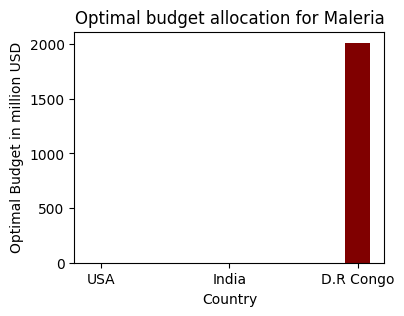

In [51]:
import matplotlib.pyplot as plt 
 
# USA x1
# Brazil
# Japan
# China
# India x5
# Indonesia
# Nigeria
# D.R Congo x8
# Germany
# U.K
# creating the dataset
data = {'USA': p.value(x12), 'India': p.value(x52), 'D.R Congo': p.value(x82)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.2)
 
plt.xlabel("Country")
plt.ylabel("Optimal Budget in million USD")
plt.title("Optimal budget allocation for Maleria")
plt.show()

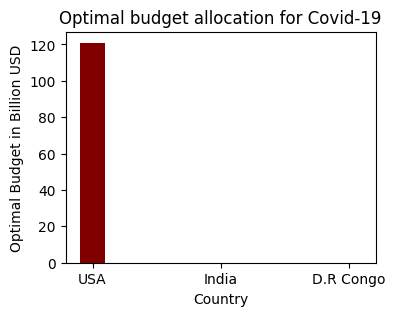

In [52]:
# USA x1
# Brazil
# Japan
# China
# India x5
# Indonesia
# Nigeria
# D.R Congo x8
# Germany
# U.K
# creating the dataset
data = {'USA': p.value(x15)/10**4, 'India': p.value(x55), 'D.R Congo': p.value(x85)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.2)
 
plt.xlabel("Country")
plt.ylabel("Optimal Budget in Billion USD")
plt.title("Optimal budget allocation for Covid-19")
plt.show()

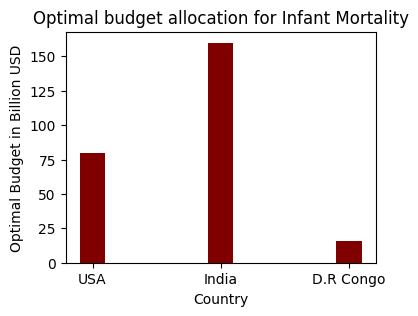

In [53]:
# USA x1
# Brazil
# Japan
# China
# India x5
# Indonesia
# Nigeria
# D.R Congo x8
# Germany
# U.K
# creating the dataset
data = {'USA': 0.1*p.value(x18)/10**3, 'India': (p.value(x58)+0.2*p.value(x18))/10**3, 'D.R Congo': (p.value(x88)+0.02*p.value(x18))/10**3}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.2)
 
plt.xlabel("Country")
plt.ylabel("Optimal Budget in Billion USD")
plt.title("Optimal budget allocation for Infant Mortality")
plt.show()

In [54]:
print(p.value(x58))

0.0
